In [1]:
import requests
import pandas as pd
from pandas import json_normalize

url = "https://www.microburbs.com.au/report_generator/api/suburb/market"
params = {
    "suburb": "Belmont North"
}
headers = {
    "Authorization": "Bearer test",
    "Content-Type": "application/json"
}

response = requests.get(url, params=params, headers=headers)
response.raise_for_status()  

data = response.json()
data

# Nếu data là dict:
print(type(data))
print(data.keys())   


<class 'dict'>
dict_keys(['results'])


In [3]:
print(data.keys())


dict_keys(['results'])


In [5]:
results = data["results"]
type(results)
len(results)


2

In [7]:
print(results[0])


[{'area_level': 'suburb', 'area_name': 'Belmont North', 'cr': {'area_level': 'cr', 'area_name': 'Newcastle and Lake Macquarie', 'property_type': 'house', 'value': 319000.0}, 'date': '2003-05-31', 'metric': 'sell_price', 'property_type': 'house', 'sa3': {'area_level': 'sa3', 'area_name': 'Lake Macquarie - East', 'property_type': 'house', 'value': 302000.0}, 'value': 277000.0}, {'area_level': 'suburb', 'area_name': 'Belmont North', 'cr': {'area_level': 'cr', 'area_name': 'Newcastle and Lake Macquarie', 'property_type': 'house', 'value': 324000.0}, 'date': '2003-06-30', 'metric': 'sell_price', 'property_type': 'house', 'sa3': {'area_level': 'sa3', 'area_name': 'Lake Macquarie - East', 'property_type': 'house', 'value': 300000.0}, 'value': 277000.0}, {'area_level': 'suburb', 'area_name': 'Belmont North', 'cr': {'area_level': 'cr', 'area_name': 'Newcastle and Lake Macquarie', 'property_type': 'house', 'value': 339000.0}, 'date': '2003-07-31', 'metric': 'sell_price', 'property_type': 'house'

In [9]:
import pandas as pd
from pandas import json_normalize

results = data["results"]   

flat_records = []
for group in results:
    flat_records.extend(group)


df = pd.DataFrame(flat_records)
df.head()


,area_level,area_name,cr,date,metric,property_type,sa3,value
0,suburb,Belmont North,"{'area_level': 'cr', 'area_name': 'Newcastle a...",2003-05-31,sell_price,house,"{'area_level': 'sa3', 'area_name': 'Lake Macqu...",277000.0
1,suburb,Belmont North,"{'area_level': 'cr', 'area_name': 'Newcastle a...",2003-06-30,sell_price,house,"{'area_level': 'sa3', 'area_name': 'Lake Macqu...",277000.0
2,suburb,Belmont North,"{'area_level': 'cr', 'area_name': 'Newcastle a...",2003-07-31,sell_price,house,"{'area_level': 'sa3', 'area_name': 'Lake Macqu...",293000.0
3,suburb,Belmont North,"{'area_level': 'cr', 'area_name': 'Newcastle a...",2003-08-31,sell_price,house,"{'area_level': 'sa3', 'area_name': 'Lake Macqu...",293000.0
4,suburb,Belmont North,"{'area_level': 'cr', 'area_name': 'Newcastle a...",2003-09-30,sell_price,house,"{'area_level': 'sa3', 'area_name': 'Lake Macqu...",295000.0


In [11]:
df = json_normalize(flat_records)
df.head()


,area_level,area_name,date,metric,property_type,value,cr.area_level,cr.area_name,cr.property_type,cr.value,sa3.area_level,sa3.area_name,sa3.property_type,sa3.value
0,suburb,Belmont North,2003-05-31,sell_price,house,277000.0,cr,Newcastle and Lake Macquarie,house,319000.0,sa3,Lake Macquarie - East,house,302000.0
1,suburb,Belmont North,2003-06-30,sell_price,house,277000.0,cr,Newcastle and Lake Macquarie,house,324000.0,sa3,Lake Macquarie - East,house,300000.0
2,suburb,Belmont North,2003-07-31,sell_price,house,293000.0,cr,Newcastle and Lake Macquarie,house,339000.0,sa3,Lake Macquarie - East,house,296000.0
3,suburb,Belmont North,2003-08-31,sell_price,house,293000.0,cr,Newcastle and Lake Macquarie,house,342000.0,sa3,Lake Macquarie - East,house,307000.0
4,suburb,Belmont North,2003-09-30,sell_price,house,295000.0,cr,Newcastle and Lake Macquarie,house,341000.0,sa3,Lake Macquarie - East,house,301000.0


In [13]:
df

,area_level,area_name,date,metric,property_type,value,cr.area_level,cr.area_name,cr.property_type,cr.value,sa3.area_level,sa3.area_name,sa3.property_type,sa3.value
0,suburb,Belmont North,2003-05-31,sell_price,house,277000.0,cr,Newcastle and Lake Macquarie,house,319000.0,sa3,Lake Macquarie - East,house,302000.0
1,suburb,Belmont North,2003-06-30,sell_price,house,277000.0,cr,Newcastle and Lake Macquarie,house,324000.0,sa3,Lake Macquarie - East,house,300000.0
2,suburb,Belmont North,2003-07-31,sell_price,house,293000.0,cr,Newcastle and Lake Macquarie,house,339000.0,sa3,Lake Macquarie - East,house,296000.0
3,suburb,Belmont North,2003-08-31,sell_price,house,293000.0,cr,Newcastle and Lake Macquarie,house,342000.0,sa3,Lake Macquarie - East,house,307000.0
4,suburb,Belmont North,2003-09-30,sell_price,house,295000.0,cr,Newcastle and Lake Macquarie,house,341000.0,sa3,Lake Macquarie - East,house,301000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,suburb,Belmont North,2025-08-31,sell_price,unit,575000.0,cr,Newcastle and Lake Macquarie,unit,680000.0,sa3,Lake Macquarie - East,unit,685000.0
785,suburb,Belmont North,2025-09-07,sell_price,unit,575000.0,cr,Newcastle and Lake Macquarie,unit,680000.0,sa3,Lake Macquarie - East,unit,686000.0
786,suburb,Belmont North,2025-09-14,sell_price,unit,575000.0,cr,Newcastle and Lake Macquarie,unit,680000.0,sa3,Lake Macquarie - East,unit,686000.0
787,suburb,Belmont North,2025-09-21,sell_price,unit,575000.0,cr,Newcastle and Lake Macquarie,unit,681000.0,sa3,Lake Macquarie - East,unit,687000.0


In [15]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
df_clean = df[[
    "date", "metric", "value",
    "cr.value", "sa3.value",
    "area_name", "property_type"
]].rename(columns={
    "value": "suburb_value",
    "cr.value": "cr_value",
    "sa3.value": "sa3_value"
})
df_clean.head()


,date,metric,suburb_value,cr_value,sa3_value,area_name,property_type
0,2003-05-31,sell_price,277000.0,319000.0,302000.0,Belmont North,house
1,2003-06-30,sell_price,277000.0,324000.0,300000.0,Belmont North,house
2,2003-07-31,sell_price,293000.0,339000.0,296000.0,Belmont North,house
3,2003-08-31,sell_price,293000.0,342000.0,307000.0,Belmont North,house
4,2003-09-30,sell_price,295000.0,341000.0,301000.0,Belmont North,house


In [17]:
df_clean.to_csv("belmont_north_market.csv", index=False)


In [19]:
import numpy as np

df_sell = df_clean[df_clean["metric"] == "sell_price"]

start = df_sell.iloc[0]["suburb_value"]
end   = df_sell.iloc[-1]["suburb_value"]
years = (df_sell.iloc[-1]["date"] - df_sell.iloc[0]["date"]).days / 365

cagr = (end/start)**(1/years) - 1
print("CAGR:", round(cagr*100, 2), "%")


CAGR: 6.05 %


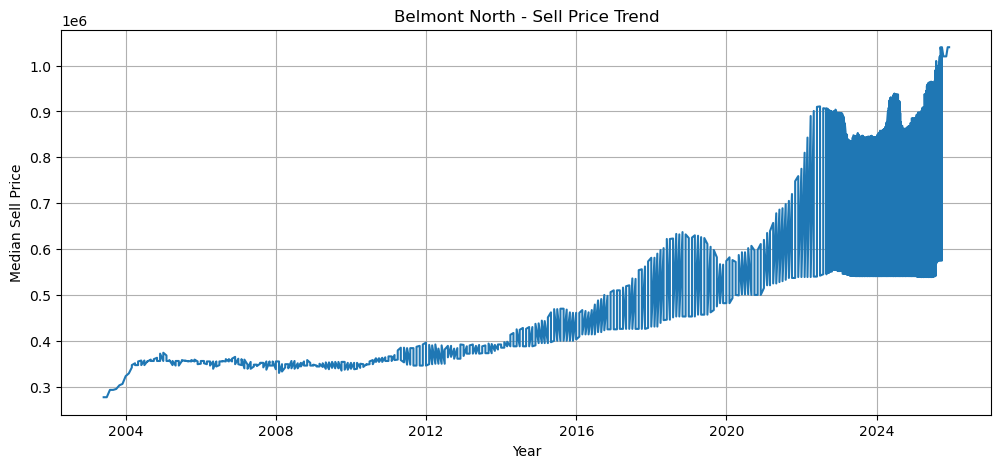

In [21]:
import matplotlib.pyplot as plt

df_sell = df_clean[df_clean["metric"] == "sell_price"]  # hoặc df nếu bạn dùng trực tiếp

plt.figure(figsize=(12, 5))
plt.plot(df_sell["date"], df_sell["suburb_value"])
plt.title("Belmont North - Sell Price Trend")
plt.xlabel("Year")
plt.ylabel("Median Sell Price")
plt.grid(True)
plt.show()


In [23]:
start = df_sell.iloc[0]["suburb_value"]
end = df_sell.iloc[-1]["suburb_value"]

growth_pct = (end - start) / start * 100

years = (df_sell.iloc[-1]["date"] - df_sell.iloc[0]["date"]).days / 365
cagr = (end / start) ** (1/years) - 1

print("Total growth: ", round(growth_pct, 2), "%")
print("CAGR: ", round(cagr * 100, 2), "% per year")


Total growth:  275.45 %
CAGR:  6.05 % per year


2025-12-11 20:14:37.782 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

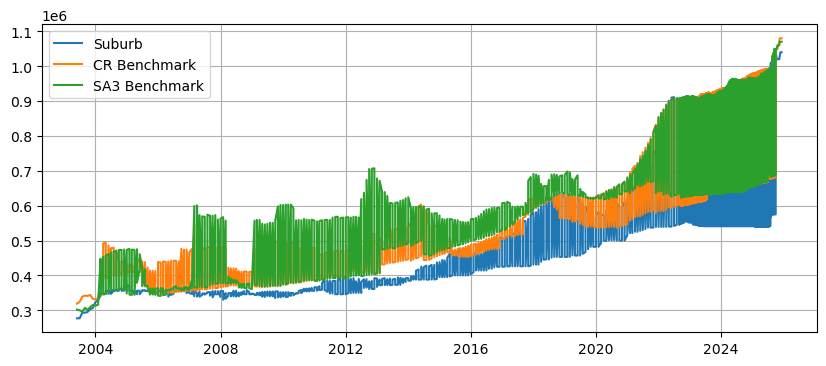

In [25]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("belmont_north_market.csv")
df["date"] = pd.to_datetime(df["date"])

st.title("Belmont North - Property Market Dashboard")

df_sell = df[df["metric"] == "sell_price"]

start = df_sell.iloc[0]["suburb_value"]
end = df_sell.iloc[-1]["suburb_value"]
growth = (end - start) / start * 100
years = (df_sell["date"].iloc[-1] - df_sell["date"].iloc[0]).days / 365
cagr = (end / start)**(1/years) - 1

col1, col2, col3 = st.columns(3)
col1.metric("Suburb", df_sell["area_name"].iloc[0])
col2.metric("Growth", f"{growth:.1f}%")
col3.metric("CAGR", f"{cagr*100:.1f}% per year")

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df_sell["date"], df_sell["suburb_value"], label="Suburb")
ax.plot(df_sell["date"], df_sell["cr_value"], label="CR Benchmark")
ax.plot(df_sell["date"], df_sell["sa3_value"], label="SA3 Benchmark")
ax.legend(); ax.grid(True)
st.pyplot(fig)

st.subheader("Recent Data")
st.dataframe(df_sell.tail(20))


In [31]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

@st.cache_data
def load_data():
    df = pd.read_csv("belmont_north_market.csv")
    df["date"] = pd.to_datetime(df["date"])
    return df

df = load_data()

st.title("Belmont North – Property Market Dashboard")
st.write("Interactive dashboard with suburb vs benchmark comparisons.")

metrics = df["metric"].unique().tolist()
metric_choice = st.selectbox("Select metric", metrics, index=metrics.index("sell_price"))

df_metric = df[df["metric"] == metric_choice].sort_values("date")

start = df_metric.iloc[0]["suburb_value"]
end = df_metric.iloc[-1]["suburb_value"]
growth_pct = (end - start) / start * 100

years = (df_metric.iloc[-1]["date"] - df_metric.iloc[0]["date"]).days / 365
cagr = (end / start)**(1/years) - 1 if years > 0 else 0

col1, col2, col3 = st.columns(3)
col1.metric("Suburb", df_metric["area_name"].iloc[0])
col2.metric("Total Growth", f"{growth_pct:.1f}%")
col3.metric("CAGR", f"{cagr*100:.1f}% per year")

st.write("---")

st.subheader(f"{metric_choice} trend over time")

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_metric["date"], df_metric["suburb_value"], label="Belmont North", linewidth=2)
ax.plot(df_metric["date"], df_metric["cr_value"], label="CR Benchmark", linestyle="--")
ax.plot(df_metric["date"], df_metric["sa3_value"], label="SA3 Benchmark", linestyle=":")
ax.set_xlabel("Year")
ax.set_ylabel(metric_choice.replace("_", " ").title())
ax.legend()
ax.grid(True)
st.pyplot(fig)

st.subheader("Latest records")
st.dataframe(df_metric.tail(20))


Writing app.py


/var/folders/d8/1h90tgfd1173kwcm00v7s9v40000gn/T/ipykernel_30992/3429437855.py:22: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df_idx.resample("A", on="date").mean(numeric_only=True).reset_index()


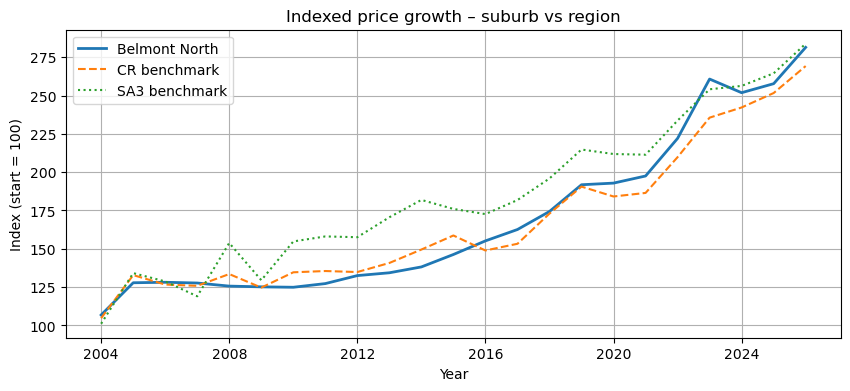

In [29]:
import pandas as pd
import matplotlib.pyplot as plt




# đảm bảo đúng kiểu
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df = df[df["metric"] == "sell_price"].copy()
df = df.sort_values("date").reset_index(drop=True)

df.head()
import numpy as np

base = df.iloc[0]

df_idx = df.copy()
df_idx["suburb_index"] = df_idx["suburb_value"] / base["suburb_value"] * 100
df_idx["cr_index"]     = df_idx["cr_value"]     / base["cr_value"]     * 100
df_idx["sa3_index"]    = df_idx["sa3_value"]    / base["sa3_value"]    * 100

yearly = df_idx.resample("A", on="date").mean(numeric_only=True).reset_index()

plt.figure(figsize=(10,4))
plt.plot(yearly["date"], yearly["suburb_index"], label="Belmont North", linewidth=2)
plt.plot(yearly["date"], yearly["cr_index"],     label="CR benchmark", linestyle="--")
plt.plot(yearly["date"], yearly["sa3_index"],    label="SA3 benchmark", linestyle=":")
plt.ylabel("Index (start = 100)")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.title("Indexed price growth – suburb vs region")
plt.show()


/var/folders/d8/1h90tgfd1173kwcm00v7s9v40000gn/T/ipykernel_30992/985637248.py:5: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_house = df_house.resample("A", on="date").median(numeric_only=True).reset_index()
/var/folders/d8/1h90tgfd1173kwcm00v7s9v40000gn/T/ipykernel_30992/985637248.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_unit  = df_unit.resample("A", on="date").median(numeric_only=True).reset_index()


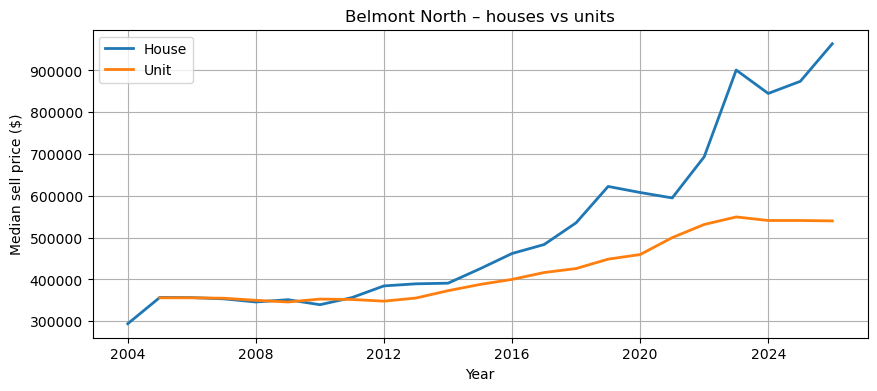

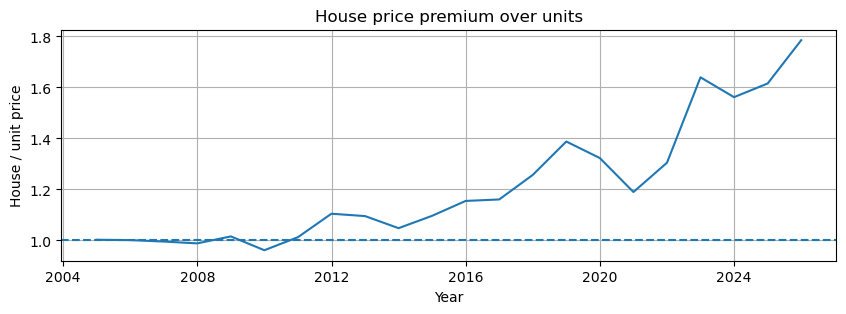

In [31]:
df_house = df[df["property_type"] == "house"].copy()
df_unit  = df[df["property_type"] == "unit"].copy()

# yearly medians for readability
annual_house = df_house.resample("A", on="date").median(numeric_only=True).reset_index()
annual_unit  = df_unit.resample("A", on="date").median(numeric_only=True).reset_index()

# 2.1 – giá median theo thời gian
plt.figure(figsize=(10,4))
plt.plot(annual_house["date"], annual_house["suburb_value"], label="House", linewidth=2)
plt.plot(annual_unit["date"],  annual_unit["suburb_value"],  label="Unit", linewidth=2)
plt.ylabel("Median sell price ($)")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.title("Belmont North – houses vs units")
plt.show()

# 2.2 – house / unit price ratio
merged = annual_house[["date","suburb_value"]].merge(
    annual_unit[["date","suburb_value"]],
    on="date",
    suffixes=("_house","_unit")
)
merged["house_unit_ratio"] = merged["suburb_value_house"] / merged["suburb_value_unit"]

plt.figure(figsize=(10,3))
plt.plot(merged["date"], merged["house_unit_ratio"])
plt.axhline(1, linestyle="--")
plt.ylabel("House / unit price")
plt.xlabel("Year")
plt.grid(True)
plt.title("House price premium over units")
plt.show()


/var/folders/d8/1h90tgfd1173kwcm00v7s9v40000gn/T/ipykernel_30992/4272869382.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_rel = df_rel.resample("A", on="date").mean(numeric_only=True).reset_index()


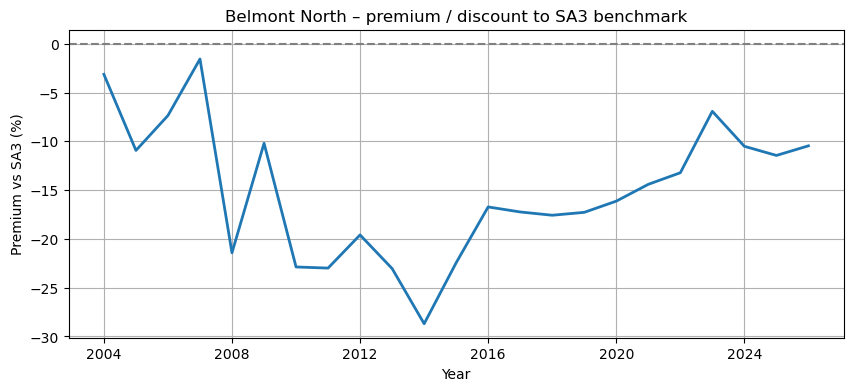

In [33]:
df_rel = df.copy()
df_rel["premium_vs_sa3_pct"] = (df_rel["suburb_value"] / df_rel["sa3_value"] - 1) * 100

yearly_rel = df_rel.resample("A", on="date").mean(numeric_only=True).reset_index()

plt.figure(figsize=(10,4))
plt.axhline(0, color="grey", linestyle="--")
plt.plot(yearly_rel["date"], yearly_rel["premium_vs_sa3_pct"], linewidth=2)
plt.ylabel("Premium vs SA3 (%)")
plt.xlabel("Year")
plt.grid(True)
plt.title("Belmont North – premium / discount to SA3 benchmark")
plt.show()


/var/folders/d8/1h90tgfd1173kwcm00v7s9v40000gn/T/ipykernel_30992/3019161600.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_house.resample("M").median(numeric_only=True)


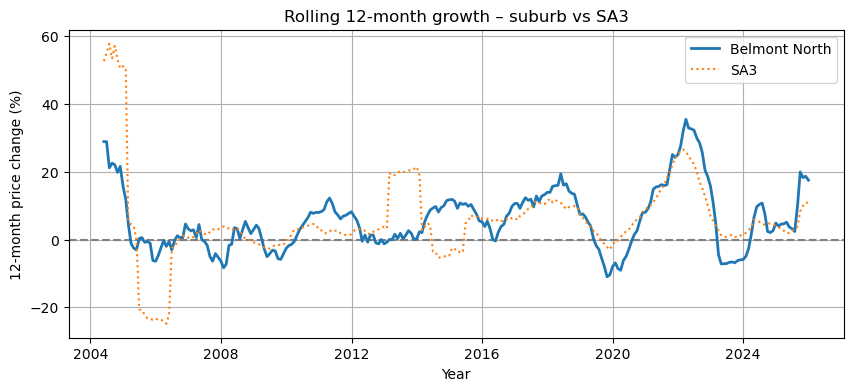

In [35]:
# focus on houses (có thể làm tương tự cho units)
df_house = df[df["property_type"] == "house"].copy()
df_house = df_house.sort_values("date").set_index("date")

monthly = df_house.resample("M").median(numeric_only=True)

monthly["suburb_12m_growth"] = monthly["suburb_value"].pct_change(12) * 100
monthly["sa3_12m_growth"]    = monthly["sa3_value"].pct_change(12) * 100

plt.figure(figsize=(10,4))
plt.axhline(0, color="grey", linestyle="--")
plt.plot(monthly.index, monthly["suburb_12m_growth"], label="Belmont North", linewidth=2)
plt.plot(monthly.index, monthly["sa3_12m_growth"], label="SA3", linestyle=":")
plt.ylabel("12-month price change (%)")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.title("Rolling 12-month growth – suburb vs SA3")
plt.show()


In [37]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(
    page_title="Belmont North Property Dashboard",
    layout="wide"
)

@st.cache_data
def load_data():
    df = pd.read_csv("belmont_north_market.csv")
    df["date"] = pd.to_datetime(df["date"], dayfirst=True)
    df = df[df["metric"] == "sell_price"].copy()
    df = df.sort_values("date").reset_index(drop=True)
    return df

df = load_data()

st.title("Belmont North Property Market Dashboard")
st.markdown(
    "This dashboard turns a long time series of suburb prices into a few simple views "
    "that are easy for residential property investors to understand."
)

df_sell = df[df["metric"] == "sell_price"].copy()

start = df_sell.iloc[0]["suburb_value"]
end = df_sell.iloc[-1]["suburb_value"]
growth = (end - start) / start * 100

years = (df_sell["date"].iloc[-1] - df_sell["date"].iloc[0]).days / 365
cagr = (end / start)**(1 / years) - 1

col1, col2, col3 = st.columns(3)
col1.metric("Start price", f"${start:,.0f}")
col2.metric("Latest price", f"${end:,.0f}")
col3.metric("Total growth", f"{growth:.1f}%")

col4, col5 = st.columns(2)
col4.metric("CAGR", f"{cagr*100:.2f}% per year")
col5.write("")

st.write("---")

tab1, tab2, tab3, tab4 = st.tabs(
    ["Growth vs region", "Houses vs units", "Premium vs SA3", "Rolling growth"]
)

# --------------------------------------------------
# TAB 1: Indexed growth vs region
# --------------------------------------------------
with tab1:
    st.subheader("Indexed price growth - suburb vs regional benchmarks")

    base = df.iloc[0]
    df_idx = df.copy()
    df_idx["suburb_index"] = df_idx["suburb_value"] / base["suburb_value"] * 100
    df_idx["cr_index"] = df_idx["cr_value"] / base["cr_value"] * 100
    df_idx["sa3_index"] = df_idx["sa3_value"] / base["sa3_value"] * 100

    yearly = df_idx.resample("A", on="date").mean(numeric_only=True).reset_index()

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(yearly["date"], yearly["suburb_index"], label="Belmont North", linewidth=2)
    ax.plot(yearly["date"], yearly["cr_index"], label="CR benchmark", linestyle="--")
    ax.plot(yearly["date"], yearly["sa3_index"], label="SA3 benchmark", linestyle=":")
    ax.set_ylabel("Index (start = 100)")
    ax.set_xlabel("Year")
    ax.grid(True)
    ax.legend()
    st.pyplot(fig)

    st.markdown(
        """
### Insights

- **Belmont North has outperformed its regional benchmarks over the long term.**  
  While all three indexes trend upward, Belmont North’s price index has consistently accelerated since 2018, ending **above both CR and SA3 benchmarks**.

- **A structural shift occurs around 2020.**  
  Post-COVID market dynamics pushed all regions upward, but Belmont North shows a **sharper and more sustained growth trajectory**, indicating stronger buyer demand and tightening supply.

- **SA3 shows more volatility**, especially in the earlier periods.  
  This suggests the broader Lake Macquarie East market experienced larger swings than Belmont North, reinforcing the suburb’s **relative stability**.

- **Since 2022, Belmont North has closed the gap with SA3 and eventually matched or exceeded its performance.**  
  This implies the suburb is transitioning from an “affordable alternative” to a **growth-leading submarket** within the region.

- **Long-term compounding effect:**  
  Starting from the same 100 index baseline, Belmont North ends near **280+**, meaning prices have **nearly tripled**, outpacing CR and matching or beating SA3 over two decades.

Overall, the index comparison reinforces Belmont North as a **strong long-term performer** with  
both **resilience during downturns** and **strong acceleration during market upswings**.

        """
    )

# --------------------------------------------------
# TAB 2: Houses vs units
# --------------------------------------------------
with tab2:
    st.subheader("Houses vs units - two markets in one suburb")

    df_house = df[df["property_type"] == "house"].copy()
    df_unit = df[df["property_type"] == "unit"].copy()

    annual_house = (
        df_house.resample("A", on="date")
        .median(numeric_only=True)
        .reset_index()
    )
    annual_unit = (
        df_unit.resample("A", on="date")
        .median(numeric_only=True)
        .reset_index()
    )

    # 2.1 price levels
    fig2, ax2 = plt.subplots(figsize=(10, 4))
    ax2.plot(
        annual_house["date"],
        annual_house["suburb_value"],
        label="House",
        linewidth=2,
    )
    ax2.plot(
        annual_unit["date"],
        annual_unit["suburb_value"],
        label="Unit",
        linewidth=2,
    )
    ax2.set_ylabel("Median sell price ($)")
    ax2.set_xlabel("Year")
    ax2.grid(True)
    ax2.legend()
    st.pyplot(fig2)

    # 2.2 price ratio
    merged = annual_house[["date", "suburb_value"]].merge(
        annual_unit[["date", "suburb_value"]],
        on="date",
        suffixes=("_house", "_unit"),
        how="inner",
    )
    merged["house_unit_ratio"] = (
        merged["suburb_value_house"] / merged["suburb_value_unit"]
    )

    fig3, ax3 = plt.subplots(figsize=(10, 3))
    ax3.plot(merged["date"], merged["house_unit_ratio"])
    ax3.axhline(1, linestyle="--", color="grey")
    ax3.set_ylabel("House / unit price")
    ax3.set_xlabel("Year")
    ax3.grid(True)
    st.pyplot(fig3)

    st.markdown(
        """
### Insights

- **Houses significantly outperform units over the long term.**  
  Since 2004, median house prices have grown from ~$300k to nearly ~$1M, while units increased from ~$350k to the mid ~$500k range.  
  This shows a **much stronger capital growth trajectory** for detached houses.

- **Around 2020, the price gap widened sharply.**  
  During the COVID housing boom, house prices accelerated dramatically, while units showed **more modest, slower gains**.  
  This suggests rising demand for land, space, and lifestyle-oriented housing.

- **Units show price stagnation after 2023.**  
  While houses continued trending upward, unit prices flattened around ~$540k.  
  This reflects lower investor activity and weaker demand for smaller dwellings post-pandemic.

- **Houses are driving market momentum.**  
  The stronger appreciation and higher volatility of house prices imply that the **suburb’s growth is land-led**, reinforcing Belmont North’s appeal to families and owner-occupiers.

- **Affordability gap continues to widen.**  
  The price ratio has shifted from roughly **1:1.1 (2004)** to **1:1.7 (2024+)**, making units the relatively more affordable entry point but also the **lower-return asset class** historically.

Overall, Belmont North demonstrates a **clear premium on land and detached housing**, with houses providing **superior long-term capital growth** and units offering **stability but limited upside**.

        """
    )


# --------------------------------------------------
# TAB 4: Rolling 12-month growth
# --------------------------------------------------
with tab3:
    st.subheader("Rolling 12-month growth - momentum and risk profile")

    df_house = df[df["property_type"] == "house"].copy()
    df_house = df_house.sort_values("date").set_index("date")

    monthly = df_house.resample("M").median(numeric_only=True)
    monthly["suburb_12m_growth"] = monthly["suburb_value"].pct_change(12) * 100
    monthly["sa3_12m_growth"] = monthly["sa3_value"].pct_change(12) * 100

    fig5, ax5 = plt.subplots(figsize=(10, 4))
    ax5.axhline(0, color="grey", linestyle="--")
    ax5.plot(
        monthly.index,
        monthly["suburb_12m_growth"],
        label="Belmont North",
        linewidth=2,
    )
    ax5.plot(
        monthly.index,
        monthly["sa3_12m_growth"],
        label="SA3 benchmark",
        linestyle=":",
    )
    ax5.set_ylabel("12-month price change (%)")
    ax5.set_xlabel("Year")
    ax5.grid(True)
    ax5.legend()
    st.pyplot(fig5)

    st.markdown(
        """
### Insights

- **Belmont North consistently shows higher volatility than the broader SA3 region.**  
  The suburb experiences sharper ups and downs, suggesting it is a more momentum-driven micro-market.  
  This often occurs in family-oriented suburbs where turnover is low and individual sales have a stronger impact on medians.

- **Periods of outperformance repeat in clear cycles.**  
  Belmont North regularly enters growth phases that exceed the regional benchmark — notably around **2017–2018**, **2021**, and again in **2024+**.  
  These surges often align with broader buyer demand shifts toward lifestyle suburbs.

- **Downturns are also sharper at suburb level.**  
  In 2020 and 2022, Belmont North dipped more steeply than SA3 before recovering.  
  This reinforces that investors should expect **higher short-term volatility** despite strong long-term performance.

- **The current trend (2023–2024) is positive.**  
  Belmont North has shifted back into strong positive territory (approaching +20% YoY at times), while the SA3 region shows more moderate growth.  
  This indicates **renewed buyer demand specific to the suburb**, not just regional strength.

- **Crossing the 0% line acts like a momentum indicator.**  
  When the blue line rises from negative into positive (e.g., 2013, 2016, 2020–2021, 2023), it reliably signals the beginning of new growth cycles.  
  Belmont North is currently in one such upward phase.

Overall, this rolling growth view highlights that Belmont North is a **high-momentum suburb that rewards long-term holders**, with cycles that **outperform the region but fluctuate more intensely in the short run**.

        """
    )


Overwriting app.py
